In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_palette("Set1")

In [2]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

In [37]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [39]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#Data Preprocessing

In [40]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['jumlah_missing', 'presentase_missing'])
    return missing_values
missing(df)

,jumlah_missing,presentase_missing
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


<AxesSubplot: >

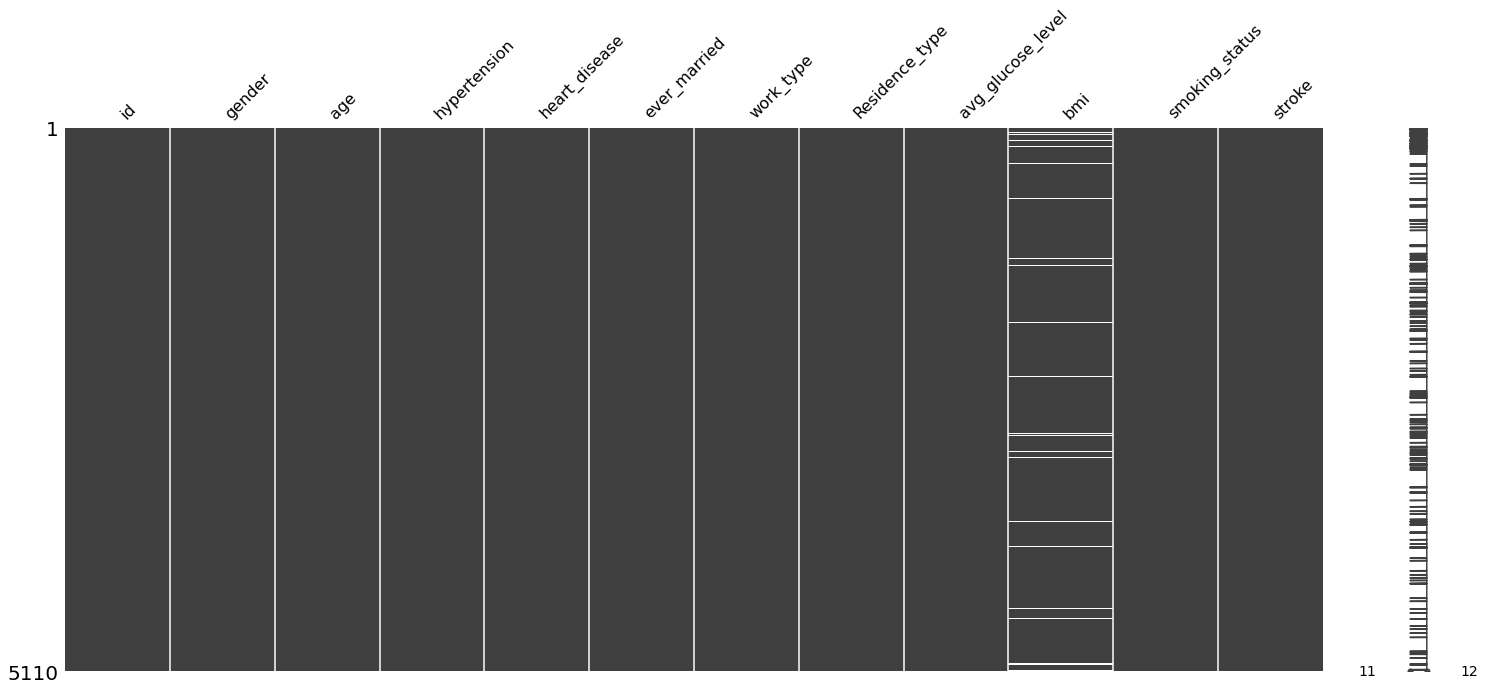

In [41]:
import missingno as mn
mn.matrix(df)

<AxesSubplot: >

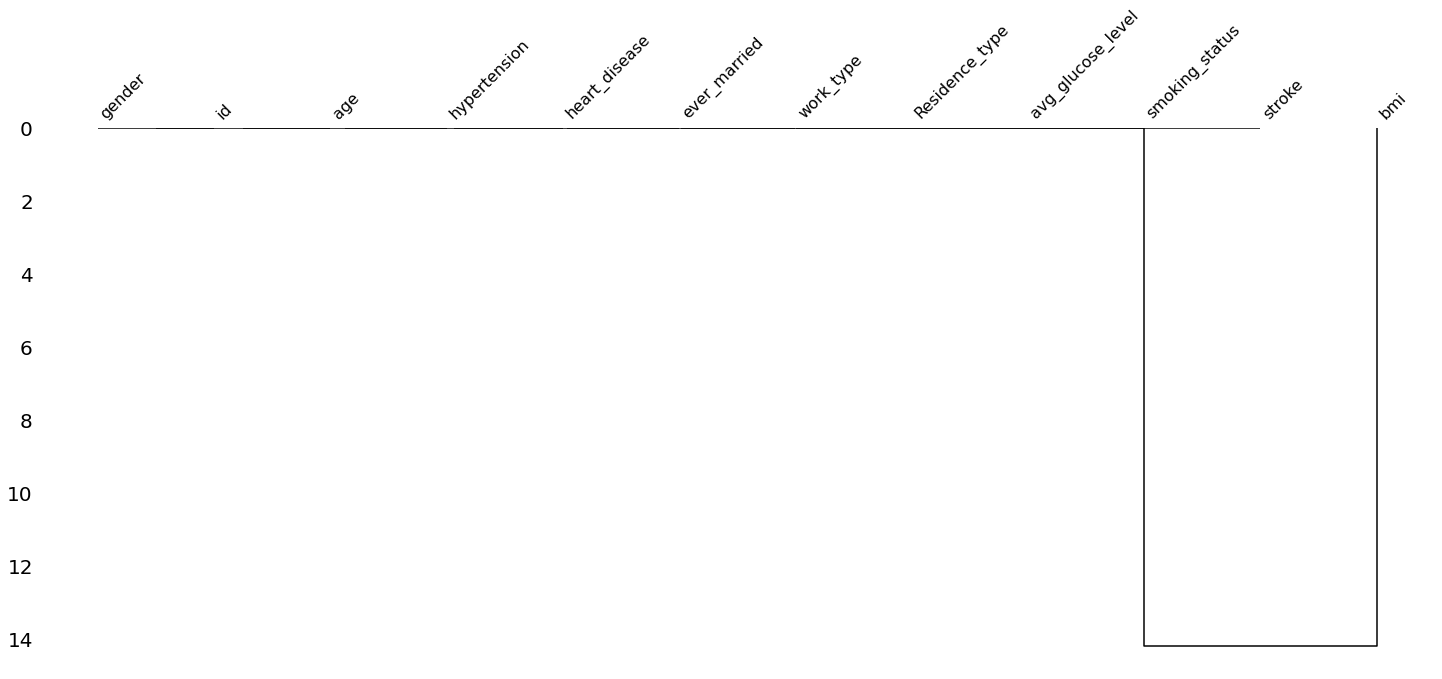

In [42]:
mn.dendrogram(df)

In [43]:
df[df['bmi'].isnull()]['smoking_status'].value_counts()

Unknown            61
smokes             52
formerly smoked    48
never smoked       40
Name: smoking_status, dtype: int64

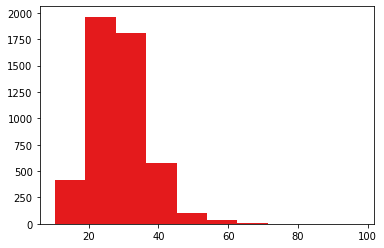

In [44]:
from matplotlib import pyplot as plt
plt.hist(df['bmi'])
plt.show()

Berdasarkan plot diatas dapat dilihat bahwa data tingkat BMI di atas terlalu diekstrapolasi, tidak aman untuk mengisi hanya menggunakan satu kategori dengan sisa nilai yang hilang

In [11]:
df['bmi'] = df['bmi'].interpolate(method ='linear', limit_direction='forward')
# Checking missing value
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Memeriksa Duplikat

In [12]:
df.duplicated().sum()

0

Tidak terdapat duplicate value pada dataset

In [13]:
df.drop(columns=['id'], inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,34.55,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


##Outliers Detection

In [45]:
categoric = list(df.select_dtypes(include=['object','bool']) )
numeric = list(df.select_dtypes(include=['int64','float64']))
print('kolom data kategorik yaitu {}'.format(categoric))
print('kolom data numerik yaitu {}'.format(numeric))

kolom data kategorik  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
kolom data numerik  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


IndexError: list index out of range

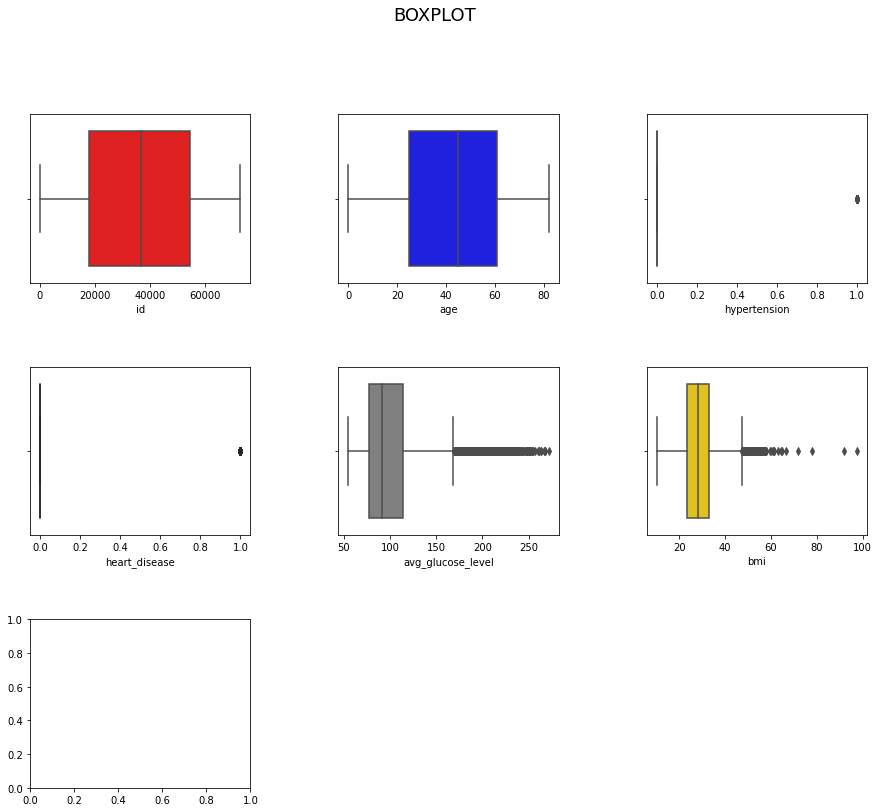

In [73]:
colours = ['red','blue','yellow', 'purple' , 'grey' , 'gold' ];
fig = plt.figure(figsize=[15,25])
fig.suptitle('BOXPLOT', fontsize=18)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric):  
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);

In [74]:
outliers = ['avg_glucose_level', 'bmi']

### Removing Outliers

In [17]:
dict={}
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in outliers:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 
    filtered_entries = ((df[col] >= lower_limit) & (df[col] <= upper_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5110
Jumlah baris setelah memfilter outlier: 4399


## Korelasi

In [18]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.252137,0.239640,-0.023948,0.368737,0.226971
hypertension,0.252137,1.000000,0.090679,0.002201,0.137106,0.113145
heart_disease,0.239640,0.090679,1.000000,-0.000697,0.061585,0.089800
avg_glucose_level,-0.023948,0.002201,-0.000697,1.000000,-0.000504,0.002849
bmi,0.368737,0.137106,0.061585,-0.000504,1.000000,0.039797
stroke,0.226971,0.113145,0.089800,0.002849,0.039797,1.000000


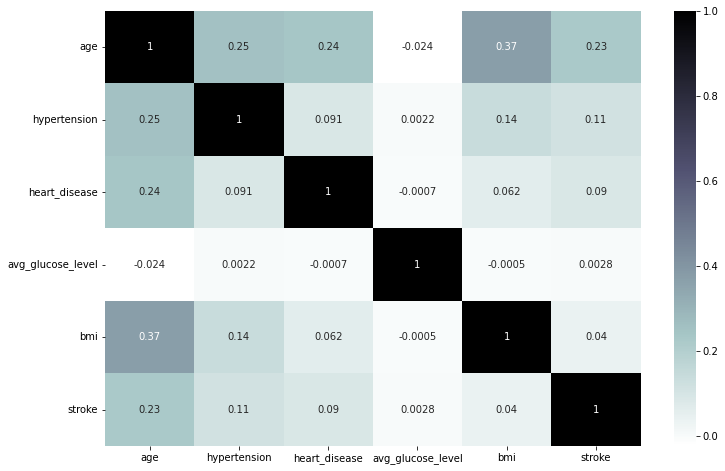

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, cmap='bone_r', annot=True, ax=ax);

Berdasarkan data matriks korelasi tidak terdapat multikolinearitas (korelasi tinggi antar feature)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,23.5,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [21]:
df = pd.get_dummies(df)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.4,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.8,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
8,59.0,0,0,76.15,23.5,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
9,78.0,0,0,58.57,24.2,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [22]:
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [23]:
# Penanganan oversampling dengan SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(4399, 21)
Shape of X after SMOTE:(8468, 21) 


Target Class distributuion before SMOTE:
0    0.962491
1    0.037509
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


## Train-Test Split Data

In [148]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X_sm,
    y_sm,
    test_size = 0.5,
    random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4234, 21), (4234,), (4234, 21), (4234,))

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Metode

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## K-Nearest Neighbors

Accuracy KNN: 0.966
Precision KNN : 0.98
Recall KNN: 0.953
F1-score KNN : 0.966


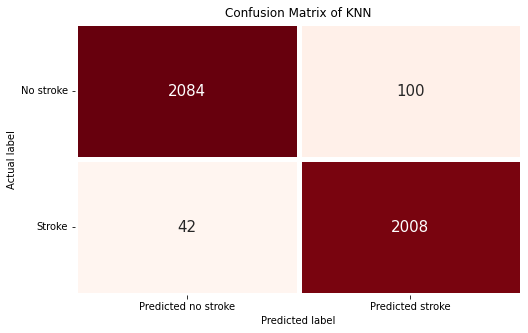

In [165]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred), 3)
precision_knn = round(precision_score(y_test , Y_pred), 3)
recall_knn = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
knn_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy KNN:', accuracy_knn)
print('Precision KNN :', precision_knn) 
print('Recall KNN:', recall_knn)
print('F1-score KNN :', f1)

plt.figure(figsize = (8, 5))
sns.heatmap(knn_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.title('Confusion Matrix of KNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

## Neural Network

Accuracy Neural Network: 0.966
Precision Neural Network : 0.993
Recall Neural Network: 0.937
F1-score Neural Network : 0.964


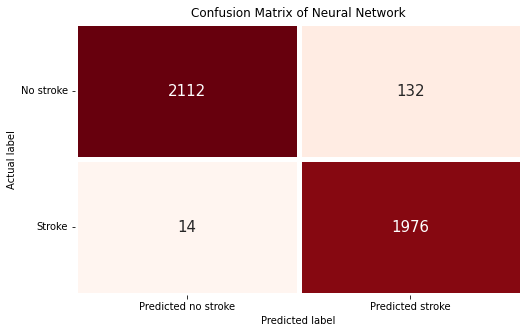

In [166]:
nn= MLPClassifier(5)
nn.fit(X_train, y_train)
np.random.seed(0)

Y_pred = nn.predict(X_test)
accuracy_nn=round(accuracy_score(y_test,Y_pred), 3)
precision_nn = round(precision_score(y_test , Y_pred) , 3)
recall_nn = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
nn_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Neural Network:', accuracy_nn)
print('Precision Neural Network :', precision_nn) 
print('Recall Neural Network:', recall_nn)
print('F1-score Neural Network :', f1)

plt.figure(figsize = (8, 5))
sns.heatmap(nn_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.title('Confusion Matrix of Neural Network')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

## Logistic Regression

Accuracy Logistic Regression: 0.959
Precision Logistic Regression : 0.988
Recall Logistic Regression: 0.929
F1-score Logistic Regression : 0.958


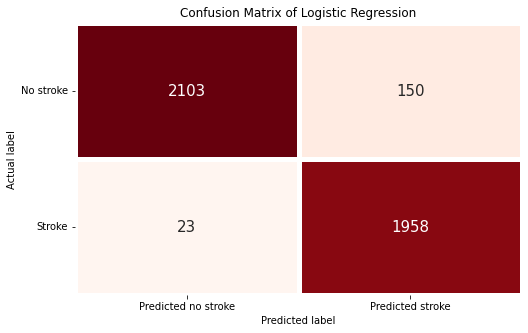

In [167]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=5)
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
accuracy_logreg=round(accuracy_score(y_test,Y_pred), 3)
precision_logreg = round(precision_score(y_test , Y_pred) , 3)
recall_logreg = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
lr_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Logistic Regression:', accuracy_logreg)
print('Precision Logistic Regression :', precision_logreg) 
print('Recall Logistic Regression:', recall_logreg)
print('F1-score Logistic Regression :', f1)


plt.figure(figsize = (8, 5))
sns.heatmap(lr_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

## Random Forest

Accuracy Random Forest: 0.967
Precision Random Forest : 0.969
Recall Random Forest: 0.964
F1-score Random Forest : 0.966


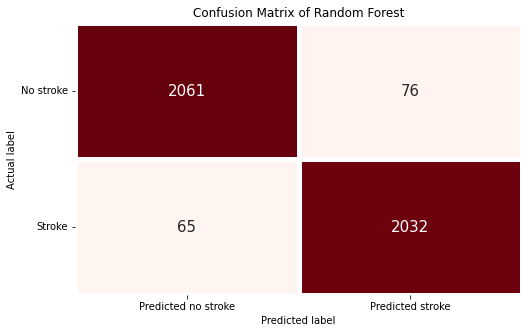

In [168]:
rf= RandomForestClassifier(5)
rf.fit(X_train, y_train)
np.random.seed(0)

Y_pred = rf.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_pred), 3)
precision_rf = round(precision_score(y_test , Y_pred) , 3)
recall_rf = round(recall_score(y_test, Y_pred), 3)
f1 = round(f1_score(y_test,Y_pred), 3)
rf_cm = confusion_matrix(Y_pred, y_test)

print('Accuracy Random Forest:', accuracy_rf)
print('Precision Random Forest :', precision_rf) 
print('Recall Random Forest:', recall_rf)
print('F1-score Random Forest :', f1)

# Visualisasi confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'Reds', annot = True, fmt = '.0f', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.yticks(rotation = 0)
plt.show()

## Model Komparasi

In [164]:
results = pd.DataFrame([["K Nearest Neighbor",accuracy_knn,precision_knn,recall_knn],
                        ["Neural Network",accuracy_nn,precision_nn,recall_nn],
                        ["Logistic Regression",accuracy_logreg,precision_logreg,recall_logreg],
                        ["Random Forest",accuracy_rf,precision_rf,recall_rf]],
columns = ["Models","Accuracy Score","Precision Score", "Recall Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Reds')

,Models,Accuracy Score,Precision Score,Recall Score
3,Random Forest,0.967000,0.969000,0.964000
0,K Nearest Neighbor,0.966000,0.980000,0.953000
1,Neural Network,0.966000,0.993000,0.937000
2,Logistic Regression,0.959000,0.988000,0.929000
